<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T4%20-%201%20-%20Linear%20Regression%20-%20Datos%20ficticios-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/python-ml-course.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive'

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [2]:
import pandas as pd
import numpy as np

In [3]:
x = 1.5 + 2.5 * np.random.randn(100)

In [4]:
res = 0 + 0.8 * np.random.randn(100)

In [5]:
y_pred = 5 + 0.3 * x

In [6]:
y_act = 5 + 0.3 * x + res

In [7]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [8]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [9]:
data.head()

,x,y_actual,y_prediccion
0,0.510688,3.129858,5.153206
1,2.599950,4.719378,5.779985
2,0.384280,3.770460,5.115284
3,-0.295036,3.917531,4.911489
4,0.666584,4.751123,5.199975


In [10]:
import matplotlib.pyplot as plt

In [11]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

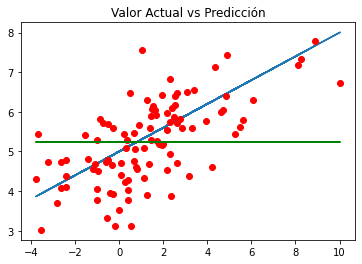

In [12]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [13]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [14]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.510688,3.129858,5.153206,0.009417,4.093939,4.496058
1,2.599950,4.719378,5.779985,0.280620,1.124888,0.281824
2,0.384280,3.770460,5.115284,0.018216,1.808552,2.189776
3,-0.295036,3.917531,4.911489,0.114758,0.987953,1.776137
4,0.666584,4.751123,5.199975,0.002527,0.201468,0.249126


In [15]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [16]:
SSR

64.92667778365941

In [17]:
SSD

66.9851707568815

In [18]:
SST

107.39909612123846

In [19]:
SSR+SSD

131.91184854054092

In [20]:
R2 = SSR/SST

In [21]:
R2

0.6045365382811634

(array([ 1.,  1.,  3., 16., 18., 21., 16., 14.,  6.,  4.]),
 array([-2.25634994, -1.82838011, -1.40041027, -0.97244044, -0.5444706 ,
        -0.11650077,  0.31146907,  0.7394389 ,  1.16740874,  1.59537857,
         2.02334841]),
 <a list of 10 Patch objects>)

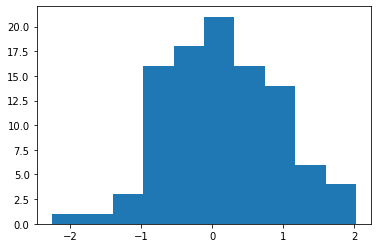

In [22]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* $y = a + bx$
* $b = \sum((x_i - x_m)*(y_i-y_m))/\sum((x_i-x_m)^2)$
* $a = y_m - b * x_m$

In [36]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.3211925754364124, 5.250248927533265)

In [37]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean) #numerador o  covarianza
data["beta_d"] = (data["x"]-x_mean)**2 #Denominador o varianza

In [38]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [39]:
alpha = y_mean - beta * x_mean

In [40]:
alpha, beta

(4.917781141504709, 0.25164218465179966)

In [41]:
data["y_model"] = alpha + beta * data["x"]

In [42]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.510688,3.129858,5.153206,0.009417,4.093939,4.496058,1.718586,0.656918,5.046292
1,2.599950,4.719378,5.779985,0.280620,1.124888,0.281824,-0.678855,1.635220,5.572038
2,0.384280,3.770460,5.115284,0.018216,1.808552,2.189776,1.386433,0.877805,5.014482
3,-0.295036,3.917531,4.911489,0.114758,0.987953,1.776137,2.153976,2.612194,4.843538
4,0.666584,4.751123,5.199975,0.002527,0.201468,0.249126,0.326732,0.428513,5.085522


In [43]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [44]:
SSR, SSD, SST

(44.18023251450845, 63.218863606730025, 107.39909612123846)

In [45]:
R2 = SSR / SST
R2

0.4113650310858779

Text(0.5, 1.0, 'Valor Actual vs Predicción vs Modelo')

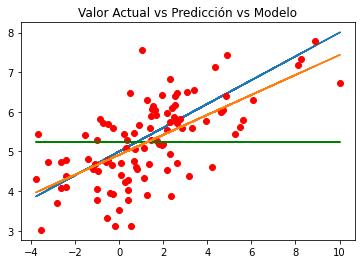

In [46]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción vs Modelo")

## Error estándar de los residuos (RSE)

In [47]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8031752268133231

In [48]:
np.mean(data["y_actual"])

5.250248927533265

In [49]:
RSE / np.mean(data["y_actual"])

0.15297850404793673